In [ ]:
#necessary on linux/mac
#import multiprocessing

#if __name__ == '__main__':
#    multiprocessing.set_start_method('forkserver')

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score

import datetime
import matplotlib

import matplotlib.pyplot as plt

import DataPrep
import error_evaluation


c:\users\scott\anaconda3\envs\python35gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "c:\users\scott\anaconda3\envs\python35gpu\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\users\scott\anaconda3\envs\python35gpu\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\users\scott\anaconda3\envs\python35gpu\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "c:\users\scott\anaconda3\envs\python35gpu\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "c:\users\scott\anaconda3\envs\python35gpu\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [ ]:
dp = DataPrep.DataPrep()
X_Above_test, X_Above_train, y_Above_test, y_Above_train, X_Near_test, X_Near_train, y_Near_test, y_Near_train, X_Below_test, X_Below_train, y_Below_test, y_Below_train = dp.prep_day1_danger_train_test(input_file='E:/Data/OAPMLData/V1.1CIAC_UAC_NWAC_FeaturesWithLabels30Days20131201To20180430.csv', ignore_extreme=True, only_critical_points=False, oversample=True, only_precise_points = False, label_critical_points=True)


In [ ]:
X_Above_test.to_pickle('E:/Temp/X_test.pkl')
X_Above_train.to_pickle('E:/Temp/X_train.pkl')

y_Above_test.to_pickle('E:/Temp/y_test.pkl')
y_Above_train.to_pickle('E:/Temp/y_train.pkl')

In [2]:
X_Above_test = pd.read_pickle('E:/Temp/X_test.pkl')
X_Above_train = pd.read_pickle('E:/Temp/X_train.pkl')

y_Above_test = pd.read_pickle('E:/Temp/y_test.pkl')
y_Above_train = pd.read_pickle('E:/Temp/y_train.pkl')

In [14]:
X_Above_test.dtypes.value_counts()

float64    865
dtype: int64

In [ ]:
len(y_Above_train['o_Day1DangerAboveTreeline'].values.ravel())

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
#ros = RandomOverSampler(random_state=42)
#ros = SMOTE(random_state=42)
ros = ADASYN(random_state=42, n_jobs=10)
X_Above_train_res, y_Above_train_res = ros.fit_resample(X_Above_train, y_Above_train['o_Day1DangerAboveTreeline'].values.ravel())


In [2]:
np.save('E:/Temp/X_train_ADASYN.npy', X_Above_train_res)
np.save('E:/Temp/y_train_ADASYN.npy', y_Above_train_res)


NameError: name 'X_Above_train_res' is not defined

In [15]:
X_Above_train_res = np.load('E:/Temp/X_train_ADASYN.npy')
y_Above_train_res = np.load('E:/Temp/y_train_ADASYN.npy')

In [35]:
idx = np.random.choice(X_Above_train_res.shape[0], 100000, replace=False)
sample_X = X_Above_train_res[idx]
sample_y = y_Above_train_res[idx]

In [38]:
np.save('E:/Temp/X_train_ADASYN_sample.npy', sample_X)
np.save('E:/Temp/y_train_ADASYN_sample.npy', sample_y)

In [28]:
sample_y[:10]

array([3, 0, 2, 2, 0, 3, 2, 0, 3, 1], dtype=int64)

In [5]:
X_Above_train = X_Above_train_res
y_Above_train = y_Above_train_res

In [7]:
len(X_Above_train_res)

455920

In [ ]:
y_Above_train_res[:10]

In [ ]:
from sklearn.utils import class_weight
class_weights = list()
class_weights.append(class_weight.compute_class_weight('balanced', np.unique(y_Above_train['o_Day1DangerAboveTreeline']), y_Above_train['o_Day1DangerAboveTreeline'].values))

In [ ]:
class_weights[0]

In [ ]:
class_weights_dict = {}
class_weights_dict[0] = 1
class_weights_dict[1] = 1
class_weights_dict[2] = 2
class_weights_dict[3] = 10

In [6]:

m = RandomForestClassifier(#n_jobs = -1,
                           #oob_score=True,
                           #n_estimators=200,
                           #max_features="sqrt",
                           #min_samples_leaf=3
                           )
#m.fit(X_Above_train.values, y_Above_train['o_Day1DangerAboveTreeline'].values.ravel())
#m.score(X_Above_train.values, y_Above_train['o_Day1DangerAboveTreeline'].values.ravel())
#m.fit(X_Above_train, y_Above_train)
#m.score(X_Above_train, y_Above_train)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
param_grid = { 
    'n_estimators': [100, 200, 700],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 3, 10]
}
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=7)
CV_rfc = GridSearchCV(estimator=m, param_grid=param_grid, scoring="neg_log_loss", cv=kfold, n_jobs=8)
CV_rfc.fit(X_Above_train[:20000], y_Above_train[:20000])
print(CV_rfc.best_params_)

{'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 700}


In [10]:
means = CV_rfc.cv_results_['mean_test_score']
stds = CV_rfc.cv_results_['std_test_score']
params = CV_rfc.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.242223 (0.000494) with: {'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 100}
-0.241596 (0.000134) with: {'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 200}
-0.240782 (0.000412) with: {'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 700}
-0.269389 (0.000148) with: {'max_features': None, 'min_samples_leaf': 3, 'n_estimators': 100}
-0.268204 (0.001132) with: {'max_features': None, 'min_samples_leaf': 3, 'n_estimators': 200}
-0.267809 (0.001079) with: {'max_features': None, 'min_samples_leaf': 3, 'n_estimators': 700}
-0.347443 (0.001535) with: {'max_features': None, 'min_samples_leaf': 10, 'n_estimators': 100}
-0.346967 (0.000737) with: {'max_features': None, 'min_samples_leaf': 10, 'n_estimators': 200}
-0.347137 (0.001537) with: {'max_features': None, 'min_samples_leaf': 10, 'n_estimators': 700}
-0.316576 (0.001007) with: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
-0.311982 (0.002597) with: {'max_features': 'sqrt', 'mi

In [13]:
m = RandomForestClassifier(n_jobs = -1,
                           oob_score=True,
                           n_estimators=700
                           #max_features="sqrt",
                           #min_samples_leaf=3
                           )
m.fit(X_Above_train, y_Above_train)
m.score(X_Above_train, y_Above_train)

1.0

In [14]:
m.oob_score_

0.9873420775574662

In [15]:
len(X_Above_test)

NameError: name 'X_Above_test' is not defined

In [17]:
len(y_Above_test)

71887

In [18]:
preds = m.predict(X_Above_test)

In [19]:
pd.Series(preds).value_counts()

1    33068
2    27872
0     9189
3     1758
dtype: int64

In [20]:
m.score(X_Above_test.values, y_Above_test['o_Day1DangerAboveTreeline'].values.ravel())


0.6132958671247931

In [21]:
X_Above_test.head()

,n_f_APCPsurface1HourForecast,n_f_10mWindSpeed1HourForecast,n_f_APCPsurface2HourForecast,n_f_10mWindSpeed2HourForecast,n_f_APCPsurface3HourForecast,n_f_10mWindSpeed3HourForecast,n_f_APCPsurface4HourForecast,n_f_10mWindSpeed4HourForecast,n_f_APCPsurface5HourForecast,n_f_10mWindSpeed5HourForecast,...,c_r_Prev3DayFreezeThawLikeliness29InPast,c_r_Prev7DayFreezeThawLikeliness29InPast,c_r_Prev3DayWindSlabLikeliness29InPast,c_r_Prev7DayWindSlabLikeliness29InPast,c_r_Prev3DayFreezeThawLikeliness30InPast,c_r_Prev7DayFreezeThawLikeliness30InPast,c_r_Prev3DayWindSlabLikeliness30InPast,c_r_Prev7DayWindSlabLikeliness30InPast,c_IsCoastalSnowpack,c_IsContenentalSnowpack
76226,0.00,2.830390,0.01,4.166778,0.05,3.875112,0.1,3.175281,0.1,2.613486,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
77900,3.75,0.886337,7.20,1.988536,10.30,3.408619,12.0,4.518070,12.3,5.379788,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
79547,0.00,1.908402,0.00,1.967396,0.00,2.083212,0.0,2.519561,0.0,2.239626,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
81182,0.00,3.232829,0.00,3.107298,0.00,3.395886,0.0,4.155732,0.0,4.745046,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
82856,1.05,3.241758,4.12,2.425065,8.69,2.687768,14.0,3.363188,16.1,4.923554,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [22]:
#only look at critical points
y_Above_test_crit = y_Above_test[y_Above_test['IsCriticalPoint']==True]
X_Above_test_crit = X_Above_test.loc[y_Above_test_crit.index, :]
preds_crit = m.predict(X_Above_test_crit)

In [23]:
#split in to forecast types
X_Above_test_cont = X_Above_test[X_Above_test['c_IsContenentalSnowpack']==True]
y_Above_test_cont = y_Above_test.loc[X_Above_test_cont.index, :]

X_Above_test_coast = X_Above_test[X_Above_test['c_IsCoastalSnowpack']==True]
y_Above_test_coast = y_Above_test.loc[X_Above_test_coast.index, :]

preds_cont = m.predict(X_Above_test_cont)
preds_coast = m.predict(X_Above_test_coast)

In [24]:
y_Above_test['Prediction'] = preds

In [40]:
#remove synthetic regions from the evaluation

synthetic_regions = ['Low West', 'Low East', 'In The Desert', 'In The Lake']
y_Above_test = y_Above_test[~y_Above_test['UnifiedRegion'].isin(synthetic_regions)]

In [26]:
y_Above_test['UnifiedRegion'].value_counts()

Olympics                       5365
Cascade East - South           5220
Northern San Juan              5130
Front Range                    5040
Cascade East - North           4495
Cascade West - South           4032
Cascade East - Central         3915
Southern San Juan              3857
Cascade West - North           3744
Vail & Summit County           3151
Uintas                         2484
Aspen                          2176
Sawatch Range                  2115
Sangre de Cristo               1602
Ogden                          1584
Cascade West - Central         1584
Logan                          1378
Steamboat & Flat Tops          1340
Skyline                        1233
Gunnison                       1224
Cascade Pass - Snoq. Pass       870
Salt Lake                       600
Mt Hood                         435
Cascade Pass - Stevens Pass     145
Provo                           144
Name: UnifiedRegion, dtype: int64

In [27]:
preds = y_Above_test['Prediction']

Accuracy: 0.5922561761290425
Classification Report
              precision    recall  f1-score   support

           0       0.38      0.18      0.24      4979
           1       0.70      0.68      0.69     32996
           2       0.48      0.68      0.56     19113
           3       0.61      0.18      0.28      5775

   micro avg       0.59      0.59      0.59     62863
   macro avg       0.54      0.43      0.44     62863
weighted avg       0.60      0.59      0.58     62863

Normalized confusion matrix
Confusion matrix, without normalization
Normalized confusion matrix
Confusion matrix, without normalization
Accuracy: 0.659212431770079
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.49      0.61      7620
           1       0.73      0.74      0.74     20148
           2       0.44      0.69      0.54      6421
           3       0.76      0.33      0.46      1719

   micro avg       0.66      0.66      0.66     35908
  

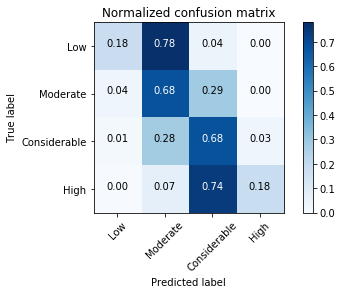

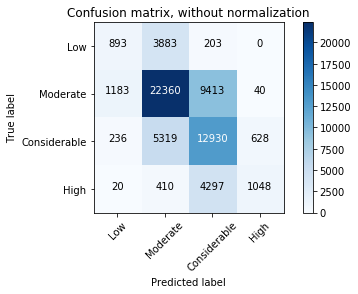

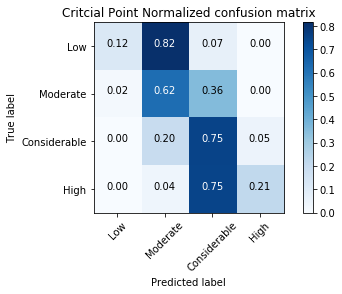

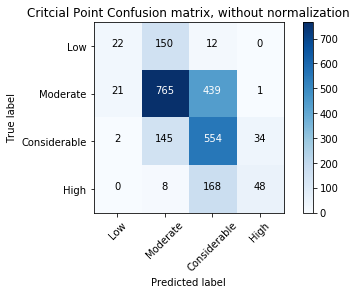

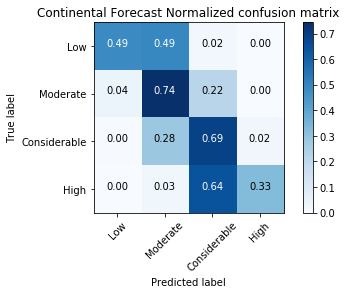

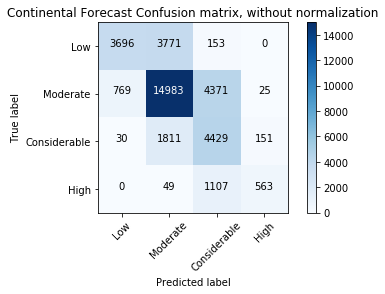

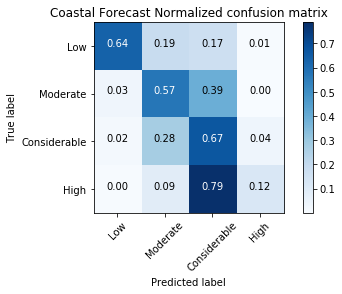

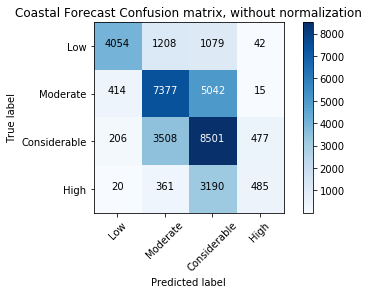

In [28]:
error_evaluation.evaluateSingleClassShort(y_Above_test['o_Day1DangerAboveTreeline'], preds)
cnf_matrix = confusion_matrix(y_Above_test['o_Day1DangerAboveTreeline'], preds)
plt.figure()
error_evaluation.plot_confusion_matrix(cnf_matrix, classes=['Low', 'Moderate', 'Considerable', 'High'], normalize=True,
                      title='Normalized confusion matrix')

plt.figure()
error_evaluation.plot_confusion_matrix(cnf_matrix, classes=['Low', 'Moderate', 'Considerable', 'High'],
                      title='Confusion matrix, without normalization')
plt.figure()
cnf_matrix_crit = confusion_matrix(y_Above_test_crit['o_Day1DangerAboveTreeline'], preds_crit)

error_evaluation.plot_confusion_matrix(cnf_matrix_crit, classes=['Low', 'Moderate', 'Considerable', 'High'], normalize=True,
                      title='Critcial Point Normalized confusion matrix')
plt.figure()
error_evaluation.plot_confusion_matrix(cnf_matrix_crit, classes=['Low', 'Moderate', 'Considerable', 'High'],
                      title='Critcial Point Confusion matrix, without normalization')

plt.figure()
error_evaluation.evaluateSingleClassShort(y_Above_test_cont['o_Day1DangerAboveTreeline'], preds_cont)
cnf_matrix_cont = confusion_matrix(y_Above_test_cont['o_Day1DangerAboveTreeline'], preds_cont)

error_evaluation.plot_confusion_matrix(cnf_matrix_cont, classes=['Low', 'Moderate', 'Considerable', 'High'], normalize=True,
                      title='Continental Forecast Normalized confusion matrix')
plt.figure()
error_evaluation.plot_confusion_matrix(cnf_matrix_cont, classes=['Low', 'Moderate', 'Considerable', 'High'],
                      title='Continental Forecast Confusion matrix, without normalization')

plt.figure()
error_evaluation.evaluateSingleClassShort(y_Above_test_coast['o_Day1DangerAboveTreeline'], preds_coast)
cnf_matrix_coast = confusion_matrix(y_Above_test_coast['o_Day1DangerAboveTreeline'], preds_coast)

error_evaluation.plot_confusion_matrix(cnf_matrix_coast, classes=['Low', 'Moderate', 'Considerable', 'High'], normalize=True,
                      title='Coastal Forecast Normalized confusion matrix')
plt.figure()
error_evaluation.plot_confusion_matrix(cnf_matrix_coast, classes=['Low', 'Moderate', 'Considerable', 'High'],
                      title='Coastal Forecast Confusion matrix, without normalization')
plt.show()

In [ ]:
y_Above_test.to_csv("evaluate_prediction2.csv")

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)
init_notebook_mode(connected=True)

In [ ]:
to_plot = y_Above_test[y_Above_test['o_Day1DangerAboveTreeline']=='High']

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lat = to_plot['Lat'].values,
        lon = to_plot['Lon'].values,
        text = 'High',
        mode = 'markers',
        marker = dict(
            size = 1,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = True,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            )
       
        ))]
layout = dict(
        title = 'Test Prediction Points',
        
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
iplot( fig )

In [ ]:
to_plot.to_csv("outsample.csv")

In [29]:
importances = pd.Series(m.feature_importances_)
out = pd.concat([pd.Series(X_Above_train.columns), importances], axis=1)
out.columns=['Feature','Score']

In [30]:
out.sort_values(by=['Score'], ascending=False)[:50]

,Feature,Score
52,n_f_APCPsurface,0.014916
73,n_r_SNOWDAS_SolidPrecip_kgpersquarem,0.010713
65,n_r_Prev1DayPrecip,0.010557
26,n_f_APCPsurface14HourForecast,0.008727
44,n_f_APCPsurface23HourForecast,0.008632
42,n_f_APCPsurface22HourForecast,0.008547
54,n_r_Prev3daySnowAccumulation,0.008102
38,n_f_APCPsurface20HourForecast,0.007950
55,n_r_Prev7daySnowAccumulation,0.007708
32,n_f_APCPsurface17HourForecast,0.007465


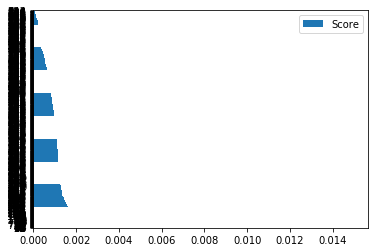

In [31]:
out.sort_values(by=['Score'], ascending=False).plot.barh()
plt.show()

In [32]:
important_features= out[out['Score'] > .001].sort_values(by=['Score'], ascending=False)['Feature']

In [33]:
X_Above_test_imp = X_Above_test[important_features]
X_Above_train_imp = X_Above_train[important_features]

In [35]:
y_Above_train

,o_Day1DangerAboveTreeline,o_Cornices_Likelihood,o_Glide_Likelihood,o_LooseDry_Likelihood,o_LooseWet_Likelihood,o_PersistentSlab_Likelihood,o_DeepPersistentSlab_Likelihood,o_StormSlabs_Likelihood,o_WetSlabs_Likelihood,o_WindSlab_Likelihood,Lat,Lon,UnifiedRegion,Date,Season,IsCriticalPoint
310239,2,no-data,no-data,no-data,no-data,1-possible,no-data,2-likely,no-data,no-data,37.044847,-105.433882,Sangre de Cristo,2014-03-08,13-14,False
312899,2,no-data,no-data,no-data,no-data,1-possible,no-data,no-data,no-data,1-possible,37.044847,-105.433882,Sangre de Cristo,2014-03-09,13-14,False
315449,1,no-data,no-data,no-data,no-data,1-possible,no-data,no-data,no-data,no-data,37.044847,-105.433882,Sangre de Cristo,2014-03-10,13-14,False
317974,1,no-data,no-data,no-data,no-data,1-possible,no-data,no-data,no-data,no-data,37.044847,-105.433882,Sangre de Cristo,2014-03-11,13-14,False
320434,1,no-data,no-data,no-data,no-data,1-possible,no-data,no-data,no-data,no-data,37.044847,-105.433882,Sangre de Cristo,2014-03-12,13-14,False
322714,1,no-data,no-data,no-data,no-data,1-possible,no-data,no-data,no-data,no-data,37.044847,-105.433882,Sangre de Cristo,2014-03-13,13-14,False
325174,1,no-data,no-data,no-data,no-data,1-possible,no-data,no-data,no-data,1-possible,37.044847,-105.433882,Sangre de Cristo,2014-03-14,13-14,False
327699,1,no-data,no-data,no-data,no-data,1-possible,no-data,no-data,no-data,1-possible,37.044847,-105.433882,Sangre de Cristo,2014-03-15,13-14,False
330359,1,no-data,no-data,no-data,no-data,1-possible,no-data,no-data,no-data,1-possible,37.044847,-105.433882,Sangre de Cristo,2014-03-16,13-14,False
1,1,no-data,no-data,no-data,no-data,no-data,no-data,no-data,no-data,1-possible,45.325032,-121.768112,Mt Hood,2013-12-11,13-14,True


In [36]:
m2 = RandomForestClassifier(n_jobs = -1,
                           oob_score=True,
                           n_estimators=700,
                           #max_features="sqrt",
                           #min_samples_leaf=3,   
                           )
m2.fit(X_Above_train_imp, y_Above_train['o_Day1DangerAboveTreeline'].values.ravel())
m2.score(X_Above_train_imp, y_Above_train['o_Day1DangerAboveTreeline'].values.ravel())

1.0

In [37]:
preds2 = m2.predict(X_Above_test_imp)

In [42]:
y_Above_test['preds'] = preds2

In [43]:
#remove synthetic regions from the evaluation

synthetic_regions = ['Low West', 'Low East', 'In The Desert', 'In The Lake']
y_Above_test = y_Above_test[~y_Above_test['UnifiedRegion'].isin(synthetic_regions)]

In [44]:
preds2 = y_Above_test['preds']

Accuracy: 0.6185673607686556
Classification Report
              precision    recall  f1-score   support

           0       0.43      0.10      0.16      4979
           1       0.68      0.79      0.73     32996
           2       0.52      0.61      0.56     19113
           3       0.71      0.13      0.23      5775

   micro avg       0.62      0.62      0.62     62863
   macro avg       0.58      0.41      0.42     62863
weighted avg       0.61      0.62      0.59     62863

Normalized confusion matrix
Confusion matrix, without normalization


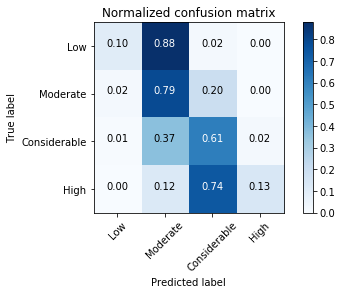

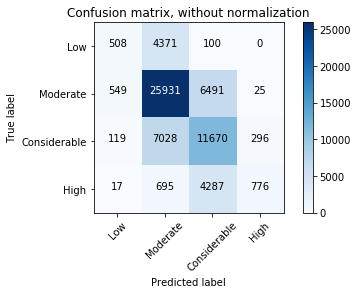

In [46]:
error_evaluation.evaluateSingleClassShort(y_Above_test['o_Day1DangerAboveTreeline'], preds2)
cnf_matrix = confusion_matrix(y_Above_test['o_Day1DangerAboveTreeline'], preds2)
plt.figure()
error_evaluation.plot_confusion_matrix(cnf_matrix, classes=['Low', 'Moderate', 'Considerable', 'High'], normalize=True,
                      title='Normalized confusion matrix')

plt.figure()
error_evaluation.plot_confusion_matrix(cnf_matrix, classes=['Low', 'Moderate', 'Considerable', 'High'],
                      title='Confusion matrix, without normalization')

In [ ]:
importances2 = pd.Series(m2.feature_importances_)
out = pd.concat([pd.Series(X_Above_train_imp.columns), importances2], axis=1)
out.columns=['Feature','Score']

In [ ]:
out.sort_values(by=['Score'], ascending=False)[:10]

In [ ]:
out.sort_values(by=['Score'], ascending=False).plot.barh()
plt.show()

In [ ]:
import re
for x in range(1, 15):
    subset_cols = ['DayOfYear',
    'c_IsContenentalSnowpack',
    'c_IsCoastalSnowpack',
    'n_f_APCPsurface1HourForecast',
    'n_f_10mWindSpeed1HourForecast',
    'n_f_APCPsurface2HourForecast',
    'n_f_10mWindSpeed2HourForecast',
    'n_f_APCPsurface3HourForecast',
    'n_f_10mWindSpeed3HourForecast',
    'n_f_APCPsurface4HourForecast',
    'n_f_10mWindSpeed4HourForecast',
    'n_f_APCPsurface5HourForecast',
    'n_f_10mWindSpeed5HourForecast',
    'n_f_APCPsurface6HourForecast',
    'n_f_10mWindSpeed6HourForecast',
    'n_f_APCPsurface7HourForecast',
    'n_f_10mWindSpeed7HourForecast',
    'n_f_APCPsurface8HourForecast',
    'n_f_10mWindSpeed8HourForecast',
    'n_f_APCPsurface9HourForecast',
    'n_f_10mWindSpeed9HourForecast',
    'n_f_APCPsurface10HourForecast',
    'n_f_10mWindSpeed10HourForecast',
    'n_f_APCPsurface11HourForecast',
    'n_f_10mWindSpeed11HourForecast',
    'n_f_APCPsurface12HourForecast',
    'n_f_10mWindSpeed12HourForecast',
    'n_f_APCPsurface13HourForecast',
    'n_f_10mWindSpeed13HourForecast',
    'n_f_APCPsurface14HourForecast',
    'n_f_10mWindSpeed14HourForecast',
    'n_f_APCPsurface15HourForecast',
    'n_f_10mWindSpeed15HourForecast',
    'n_f_APCPsurface16HourForecast',
    'n_f_10mWindSpeed16HourForecast',
    'n_f_APCPsurface17HourForecast',
    'n_f_10mWindSpeed17HourForecast',
    'n_f_APCPsurface18HourForecast',
    'n_f_10mWindSpeed18HourForecast',
    'n_f_APCPsurface19HourForecast',
    'n_f_10mWindSpeed19HourForecast',
    'n_f_APCPsurface20HourForecast',
    'n_f_10mWindSpeed20HourForecast',
    'n_f_APCPsurface21HourForecast',
    'n_f_10mWindSpeed21HourForecast',
    'n_f_APCPsurface22HourForecast',
    'n_f_10mWindSpeed22HourForecast',
    'n_f_APCPsurface23HourForecast',
    'n_f_10mWindSpeed23HourForecast',
    'n_f_tempMaxF',
    'n_f_10mWindSpeedMax',
    'n_r_snowDepthIn',
    'n_f_tempMinF',
    'n_f_tempAveF',
    'n_f_10mWindSpeed',
    'n_f_APCPsurface',
    'n_r_precipIncrementSnowIn',
    'n_r_Prev3daySnowAccumulation',
    'n_r_Prev7daySnowAccumulation',
    'n_r_Prev3dayMaxTemp',
    'n_r_Prev3DayMax10mWind',
    'n_r_Prev3dayMinTemp',
    'n_r_Prev7dayMaxTemp',
    'n_r_Prev7DayMax10mWind',
    'n_r_Prev7dayMinTemp',
    'n_r_Prev1dayMaxTemp',
    'n_r_Prev1DayMax10mWind',
    'n_r_Prev1dayMinTemp',
    'n_r_Prev1DayPrecip',
    'n_f_Next24HourChangeInTempFromPrev3DayMax',
    'n_f_Next24HoursChangeInTempFromPrev1DayMax',
    'n_r_Prev24HoursPrecipAsRainTotalIn',
    'n_r_SNOWDAS_SnowDepth_mm',
    'n_r_SNOWDAS_SWE_mm',
    'n_r_SNOWDAS_SnowmeltRunoff_micromm',
    'n_r_SNOWDAS_Sublimation_micromm',
    'n_r_SNOWDAS_SolidPrecip_kgpersquarem',
    'n_r_SNOWDAS_LiquidPrecip_kgpersquarem',
    'n_r_SNOWDAS_SnowpackAveTemp_k']
    for y in range(1, x):
        day_regex = ""
        #print("loop x: " + str(x) + " y: " + str(y))
        expression = '.+\D'+str(y)+'InPast'
        #print("e:"+expression)
        day_regex = re.compile(expression)
        match_cols = list(filter(day_regex.match, cols))
        #print("match len: " + str(len(match_cols)))
        subset_cols = subset_cols + match_cols
    print("Have len: " + str(len(subset_cols)))
    ds = X_Near_train[subset_cols]
    ds_test = X_Near_test[subset_cols]
    m3 = RandomForestClassifier(n_jobs = -1,
                           oob_score=True,
                           n_estimators=500,
                           max_features="sqrt"
                           )
    m3.fit(ds.values, y_Near_train['o_Day1DangerNearTreeline'].values.ravel())
    preds3 = m3.predict(ds_test)
    error_evaluation.evaluateSingleClassShort(y_Near_test['o_Day1DangerNearTreeline'], preds3)
    
    

In [ ]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

RANDOM_STATE = 123

# Generate a binary classification dataset.
#X, y = make_classification(n_samples=500, n_features=25,
#                           n_clusters_per_class=1, n_informative=15,
#                           random_state=RANDOM_STATE)
X = X_Above_train
y = y_Above_train[yColumns]

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               n_jobs = 3,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               n_jobs = 3,
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               n_jobs=3,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 500

for label, clf in ensemble_clfs:
    i = min_estimators
    for i in range(min_estimators, max_estimators + 1, 25):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:

lat_lon_cache = pd.read_csv('../Data/LatLonCache.csv')
def find_nearest_forecast_point(row):
    
    tmp_lat_lon_cache = lat_lon_cache.copy()
   
    #TODO: currently a simple esitmate for converting lon to miles, 53 degrees per mile--need to do better for the real deal
    tmp_lat_lon_cache['distance'] = np.sqrt(np.square(69.0*(lat_lon_cache['Lat']-row['Lat'])) + np.square(53.0*(lat_lon_cache['Lon']-row['Lon'])))
    #tmp_lat_lon_cache['distance'] = tmp_lat_lon_cache[:3].apply(lambda x: estimate_distance_between_points_mi(lat, lon, x['Lat'], x['Lon']), axis=1)
    print("after distance calc")
    #nearest point needs to be within 20 miles
    nearest_row = tmp_lat_lon_cache.sort_values(by=['distance']).iloc[0, :]
    if nearest_row['distance'] > 20.0:
        #should never happen since our grid is smaller but just in case
        return -1, -1
    else:
        return nearest_row['Lat'], nearest_row['Lon']

In [ ]:
def is_critical_point(row, critical_points):
    for cp in critical_points:
        if(row['Lat'] == cp[0] and row['Lon'] == cp[1]):
            return True
    return False

lat_lon_cache = pd.read_csv('../Data/LatLonCache.csv')
critical_points = pd.read_csv('../Data/CriticalPointsToForecast.csv')
critical_forecast_points = critical_points.apply(find_nearest_forecast_point, axis=1)




        

In [ ]:

#X_Above_test, X_Above_train, y_Above_test, y_Above_train
tmp = y_Above_test.apply(lambda x: is_critical_point(x, critical_forecast_points), axis=1)


In [ ]:
tmp.value_counts()

In [ ]:
lat_lon_cache = pd.read_csv('../Data/LatLonCache.csv')

In [ ]:
critical_points = pd.read_csv('../Data/CriticalPointsToForecast.csv')

In [ ]:
lat_lon_cache.columns

In [ ]:
np.sqrt(np.square(69.0*(lat_lon_cache['Lat']-47.981010)) + np.square(53.0*(lat_lon_cache['Lon']--123.472400)))